# Read and Discover Causal Graphs

## Import all the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import networkx as nx

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges
from causallearn.search.ConstraintBased.FCI import fci


c:\Users\Francisco\anaconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Custom functions

In [3]:
# Retrieves name for filename
def get_file_name(var:str):
    return var[7:-4]

## Show datasets in folders

In [4]:
# Specify the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'

# Get a list of all items (files and directories) in the specified path
all_items = os.listdir(directory_path)

# Iterate over each item and check if it's a directory
for item in all_items:
    folder_path = os.path.join(directory_path, item)
    if os.path.isdir(folder_path):
        if item[:7] != 'Results':
            print(f"\nFolder: {item}")
            folder_contents = os.listdir(folder_path)
            for file in folder_contents:
                file_path = os.path.join(folder_path, file)
                print(f"    -> {file}")


Folder: Dataset_2024-08-01_14-21-20
    -> data_1_normal.csv
    -> data_1_event.csv
    -> data_2_size_1.csv
    -> data_2_event.csv
    -> data_3_feeder_3.csv
    -> data_3_event.csv
    -> data_4_gripper_1.csv
    -> data_4_event.csv
    -> data_5_max_Vel_2.csv
    -> data_5_event.csv
    -> data_6_size_1.csv
    -> data_6_event.csv
    -> data_7_feeder_3.csv
    -> data_7_event.csv
    -> data_8_gripper_1.csv
    -> data_8_event.csv
    -> data_9_max_Vel_2.csv
    -> data_9_event.csv

Folder: Dataset_2024-08-01_20-12-23
    -> data_1_normal.csv
    -> data_1_event.csv
    -> data_2_size_1.csv
    -> data_2_event.csv
    -> data_3_feeder_3.csv
    -> data_3_event.csv
    -> data_4_gripper_1.csv
    -> data_4_event.csv
    -> data_5_max_Vel_2.csv
    -> data_5_event.csv
    -> data_6_size_1.csv
    -> data_6_event.csv
    -> data_7_feeder_3.csv
    -> data_7_event.csv
    -> data_8_gripper_1.csv
    -> data_8_event.csv
    -> data_9_max_Vel_2.csv
    -> data_9_event.csv

Folder: Dat

## Select folder to read

The specific folder will be asked. The files from the folder will be used to plot the various graphs.

In [5]:
folder_input = input("Please select folder.")

In [6]:
# Specify the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'
files = {}
folder = folder_input

folder_path = os.path.join(directory_path, folder)
if os.path.isdir(folder_path):
    print(f"Chosen folder: {folder}")
    folder_contents = os.listdir(folder_path)
    for file in folder_contents:
        file_path = os.path.join(folder_path, file)
        if file[0:4] == 'data' and file[7:12] != 'event':
            files[f"{file[5:6]}_{get_file_name(file)}"] = file_path
            print(f"-> {file[5:6]}_{get_file_name(file)}")
        if file[7:12] == 'event':
            files[f"{file[5:6]}_{get_file_name(file)}"] = file_path
        
file_input = '1_normal'
file_selected = files[file_input]
file_selected

Chosen folder: Dataset_2024-08-06_16-12-33
-> 1_normal
-> 2_size_1
-> 3_feeder_3
-> 4_gripper_1
-> 5_max_Vel_2
-> 6_size_1
-> 7_feeder_3
-> 8_gripper_1
-> 9_max_Vel_2


'G:\\My Drive\\Master Thesis\\Simulation\\Dataset\\Dataset_2024-08-06_16-12-33\\data_1_normal.csv'

### Nodes

In [7]:
EoL_nodes = ['EoL_1_X', 'EoL_1_Y',
             'EoL_2_X', 'EoL_2_Y',
             'EoL_3_X', 'EoL_3_Y',
             'EoL_4_X', 'EoL_4_Y',
             'EoL_5_X','EoL_5_Y',
             'EoL_6_X', 'EoL_6_Y']

con_nodes = ['con_1','con_2','con_3']

rob_mv_nodes = ['rob_1_1', 'rob_1_2','rob_1_3', 'rob_1_4',
             'rob_2_1', 'rob_2_2','rob_2_3', 'rob_2_4']

rob_ctrl_nodes =['rob_1_maxVel', 'rob_1_supply','rob_1_vacuum',
             'rob_2_maxVel', 'rob_2_supply','rob_2_vacuum']

cam_nodes = ['cam_1_X', 'cam_2_X', 'cam_3_X',
             'cam_1_Y', 'cam_2_Y', 'cam_3_Y']

nodes = EoL_nodes+con_nodes+rob_mv_nodes+rob_ctrl_nodes+cam_nodes+ ['score']

In [8]:
nodes_dict = {index: node for index, node in enumerate(nodes)}
normal_data_df = pd.read_csv(file_selected)
normal_data_df = normal_data_df[nodes]

### PC Algorithm

In [9]:

graph_discovered_pc = pc(normal_data_df.to_numpy(), node_names=nodes)
graph_discovered_pc.to_nx_graph()
graph_pc = graph_discovered_pc.G

Depth=5, working on node 35: 100%|██████████| 36/36 [00:00<00:00, 119.69it/s]


### FCI Algorithm

In [10]:
graph_discovered_fci,_ = fci(normal_data_df.to_numpy(), node_names=nodes)
graph_fci = graph_discovered_fci

Depth=0, working on node 0:   0%|          | 0/36 [00:00<?, ?it/s]

Depth=0, working on node 35: 100%|██████████| 36/36 [00:01<00:00, 19.51it/s]


X1 --> X3
X1 --> X7
X36 --> X1
X2 --> X12
X10 --> X4
X8 --> X7
X36 --> X8
X9 --> X36
X36 --> X10
X19 --> X18


Number of edges: 49
Number of nodes: 36


c:\Users\Francisco\anaconda3\envs\thesis\lib\site-packages\networkx\drawing\nx_pylab.py:305: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


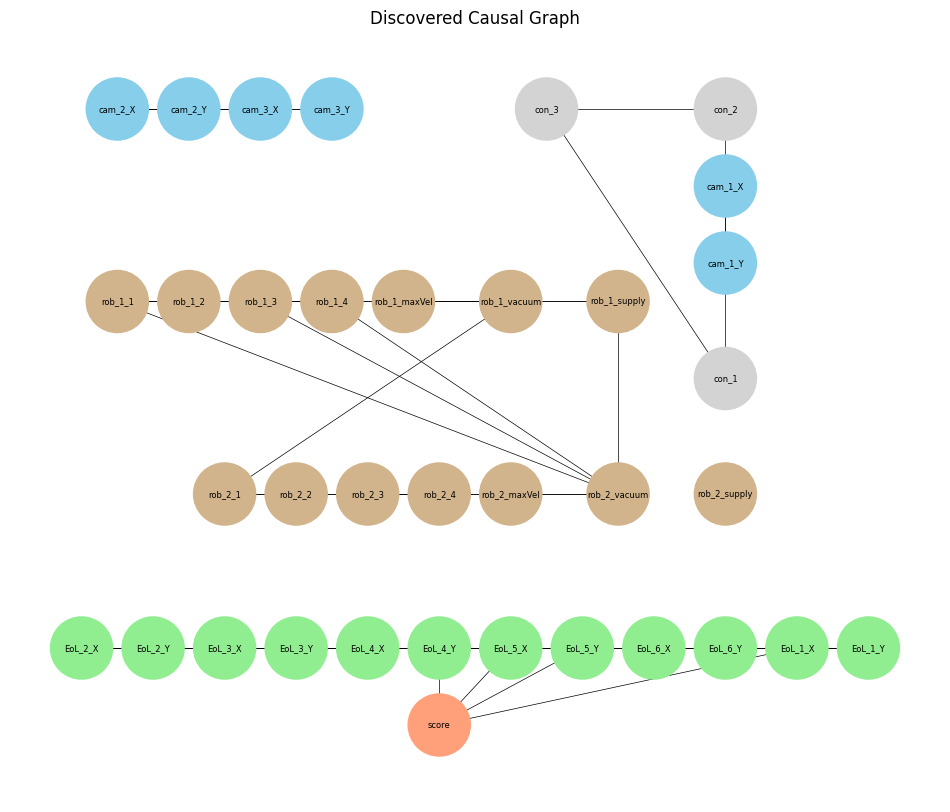

In [11]:
pos = {
    'cam_1_X':(8,4), 'cam_2_X':(-9,6), 'cam_3_X':(-5,6),
    'cam_1_Y':(8,2), 'cam_2_Y':(-7,6), 'cam_3_Y':(-3,6),
    'EoL_1_X':(10,-8), 'EoL_2_X':(-10,-8), 'EoL_3_X':(-6,-8), 'EoL_4_X':(-2,-8), 'EoL_5_X':(2,-8), 'EoL_6_X':(6,-8),
    'EoL_1_Y':(12,-8), 'EoL_2_Y':(-8,-8), 'EoL_3_Y':(-4,-8), 'EoL_4_Y':(0,-8), 'EoL_5_Y':(4,-8), 'EoL_6_Y':(8,-8),
    'score':(0,-10),
    'rob_2_1':(-6,-4), 'rob_2_2':(-4,-4), 'rob_2_3':(-2,-4), 'rob_2_4':(-0,-4), 'rob_2_maxVel':(2,-4),
    'rob_1_1':(-9,1), 'rob_1_2':(-7,1), 'rob_1_3':(-5,1), 'rob_1_4':(-3,1), 'rob_1_maxVel':(-1,1),
    'rob_1_vacuum':(2,1), 'rob_2_vacuum':(5,-4),'rob_1_supply':(5,1), 'rob_2_supply':(8,-4),
    'con_1':(8,-1),'con_2':(8,6),'con_3':(3,6)
}

colors = {
    'cam_1_X':'skyblue', 'cam_2_X':'skyblue', 'cam_3_X':'skyblue',
    'cam_1_Y':'skyblue', 'cam_2_Y':'skyblue', 'cam_3_Y':'skyblue',
    'EoL_1_X':'lightgreen', 'EoL_2_X':'lightgreen', 'EoL_3_X':'lightgreen', 'EoL_4_X':'lightgreen', 'EoL_5_X':'lightgreen', 'EoL_6_X':'lightgreen',
    'EoL_1_Y':'lightgreen', 'EoL_2_Y':'lightgreen', 'EoL_3_Y':'lightgreen', 'EoL_4_Y':'lightgreen', 'EoL_5_Y':'lightgreen', 'EoL_6_Y':'lightgreen',
    'score':'lightsalmon',
    'rob_1_1':'tan', 'rob_1_2':'tan', 'rob_1_3':'tan', 'rob_1_4':'tan', 'rob_1_maxVel':'tan',
    'rob_2_1':'tan', 'rob_2_2':'tan', 'rob_2_3':'tan', 'rob_2_4':'tan', 'rob_2_maxVel':'tan',
    'rob_1_vacuum':'tan', 'rob_2_vacuum':'tan','rob_1_supply':'tan', 'rob_2_supply':'tan',
    'con_1':'lightgrey','con_2':'lightgrey','con_3':'lightgrey'
}

G = nx.from_numpy_array(graph_pc.graph)

G_new = nx.relabel_nodes(G,nodes_dict)

print('Number of edges: '+str(len(G_new.edges)))
print('Number of nodes: '+str(len(G_new.nodes)))

plt.figure(figsize=(12, 10))
plt.xlim((-12,14))
plt.ylim((-12,8))
plt.title(f'Discovered Causal Graph', fontsize=12)
nx.draw(G_new, pos,with_labels=True,node_size=2000, node_color=[colors[node] for node in G_new.nodes()], font_size=6, arrowsize=8,width=0.5)

Number of edges: 49
Number of nodes: 36


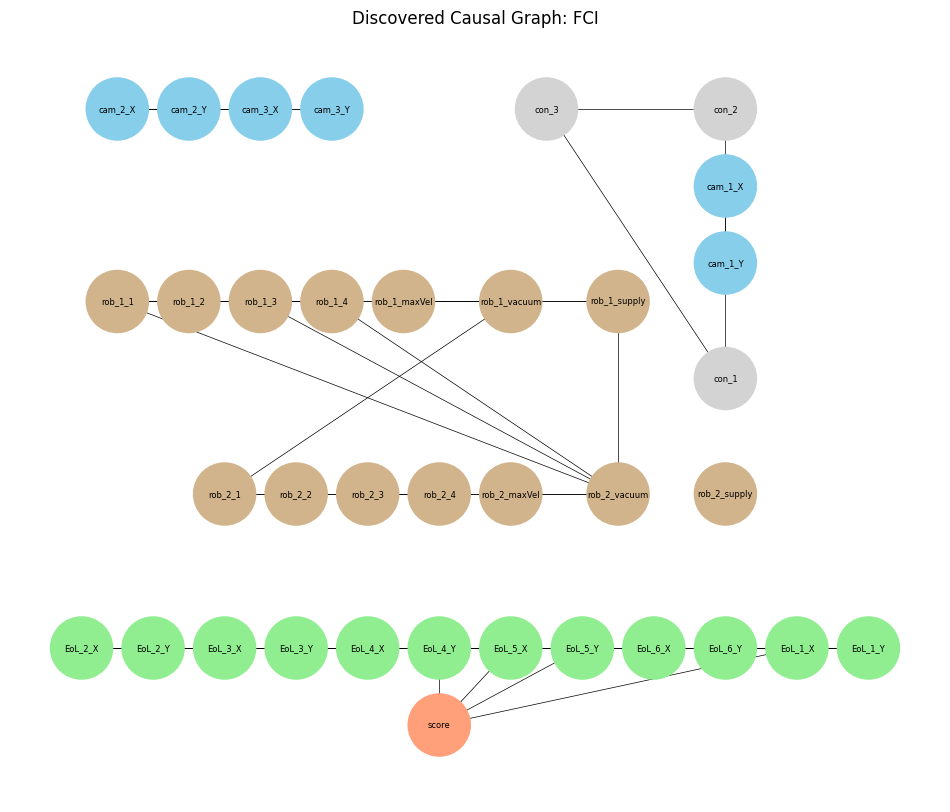

In [12]:
G = nx.from_numpy_array(graph_fci.graph)
G_new = nx.relabel_nodes(G,nodes_dict)

print('Number of edges: '+str(len(G_new.edges)))
print('Number of nodes: '+str(len(G_new.nodes)))

plt.figure(figsize=(12, 10))
plt.xlim((-12,14))
plt.ylim((-12,8))
plt.title(f'Discovered Causal Graph: FCI', fontsize=12)
nx.draw(G_new, pos,with_labels=True,node_size=2000, node_color=[colors[node] for node in G_new.nodes()], font_size=6, arrowsize=8,width=0.5)

